# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

#### In the cell below, we will start by importing all the necessary packages needed for this project

In [1]:
#import all neccessary packages
import pandas as pd
import requests
import tweepy
from timeit import default_timer as timer
import json
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### After downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv), below this cell, we will read it into a pandas datafram called df_archive

In [2]:
#Read 'twitter_archive_enhanced.csv' into a Pandas Dataframe
df_archive=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

#### The second step of gathering the data needed for this project is to programatically download the tweet image prediction which is in .tsv file format (image_predictions.tsv) and then read it into a Pandas Dataframe.

In [3]:
#using request library to download the tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
#Writing the downloaded file into a .tsv file using requests.content method
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)
    
#Read 'image_predictions.tsv' into a Pandas Dataframe       
df_image_prediction = pd.read_csv('image-predictions.tsv' , sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### The third step of gathering the data is to use the Tweepy library to query the retweet count and the fovarite count from twitter, query using the tweet id from twitter-archive-enhanced.csv so as to get the data for those tweet ids only 

In [5]:
consumer_key = 'HIDDEN' #API Key
consumer_secret = 'HIDDEN' #API Key Secret
access_token = 'HIDDEN' #Access Token
access_secret = ''#Access Token Secret

#setting authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

##### The code below was gotten from the Udacity classroom provided by the instructor. `https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py`

In [15]:
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.HTTPException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Rate limit reached. Sleeping for: 192


Success
1471: 694001791655137281
Success
1472: 693993230313091072
Success
1473: 693942351086120961
Success
1474: 693647888581312512
Success
1475: 693644216740769793
Success
1476: 693642232151285760
Success
1477: 693629975228977152
Success
1478: 693622659251335168
Success
1479: 693590843962331137
Success
1480: 693582294167244802
Success
1481: 693486665285931008
Success
1482: 693280720173801472
Success
1483: 693267061318012928
Success
1484: 693262851218264065
Success
1485: 693231807727280129
Success
1486: 693155686491000832
Success
1487: 693109034023534592
Success
1488: 693095443459342336
Success
1489: 692919143163629568
Success
1490: 692905862751522816
Success
1491: 692901601640583168
Success
1492: 692894228850999298
Success
1493: 692828166163931137
Success
1494: 692752401762250755
Success
1495: 692568918515392513
Success
1496: 692535307825213440
Success
1497: 692530551048294401
Success
1498: 692423280028966913
Success
1499: 692417313023332352
Success
1500: 692187005137076224
Success
15

Success
1720: 680161097740095489
Success
1721: 680145970311643136
Success
1722: 680130881361686529
Success
1723: 680115823365742593
Success
1724: 680100725817409536
Success
1725: 680085611152338944
Success
1726: 680070545539371008
Success
1727: 680055455951884288
Fail
1728: 679877062409191424
Success
1729: 679872969355714560
Success
1730: 679862121895714818
Success
1731: 679854723806179328
Success
1732: 679844490799091713
Success
1733: 679828447187857408
Success
1734: 679777920601223168
Success
1735: 679736210798047232
Success
1736: 679729593985699840
Success
1737: 679722016581222400
Success
1738: 679530280114372609
Success
1739: 679527802031484928
Success
1740: 679511351870550016
Success
1741: 679503373272485890
Success
1742: 679475951516934144
Success
1743: 679462823135686656
Success
1744: 679405845277462528
Success
1745: 679158373988876288
Success
1746: 679148763231985668
Success
1747: 679132435750195208
Success
1748: 679111216690831360
Success
1749: 679062614270468097
Success
1750:

Success
1969: 673320132811366400
Success
1970: 673317986296586240
Success
1971: 673295268553605120
Success
1972: 673270968295534593
Success
1973: 673240798075449344
Success
1974: 673213039743795200
Success
1975: 673148804208660480
Success
1976: 672997845381865473
Success
1977: 672995267319328768
Success
1978: 672988786805112832
Success
1979: 672984142909456390
Success
1980: 672980819271634944
Success
1981: 672975131468300288
Success
1982: 672970152493887488
Success
1983: 672968025906282496
Success
1984: 672964561327235073
Success
1985: 672902681409806336
Success
1986: 672898206762672129
Success
1987: 672884426393653248
Success
1988: 672877615439593473
Success
1989: 672834301050937345
Success
1990: 672828477930868736
Success
1991: 672640509974827008
Success
1992: 672622327801233409
Success
1993: 672614745925664768
Success
1994: 672609152938721280
Success
1995: 672604026190569472
Success
1996: 672594978741354496
Success
1997: 672591762242805761
Success
1998: 672591271085670400
Success
19

Success
2218: 668528771708952576
Success
2219: 668507509523615744
Success
2220: 668496999348633600
Success
2221: 668484198282485761
Success
2222: 668480044826800133
Success
2223: 668466899341221888
Success
2224: 668297328638447616
Success
2225: 668291999406125056
Success
2226: 668286279830867968
Success
2227: 668274247790391296
Success
2228: 668268907921326080
Success
2229: 668256321989451776
Success
2230: 668248472370458624
Success
2231: 668237644992782336
Success
2232: 668226093875376128
Success
2233: 668221241640230912
Success
2234: 668204964695683073
Success
2235: 668190681446379520
Success
2236: 668171859951755264
Success
2237: 668154635664932864
Success
2238: 668142349051129856
Success
2239: 668113020489474048
Success
2240: 667937095915278337
Success
2241: 667924896115245057
Success
2242: 667915453470232577
Success
2243: 667911425562669056
Success
2244: 667902449697558528
Success
2245: 667886921285246976
Success
2246: 667885044254572545
Success
2247: 667878741721415682
Success
22

#### In the next two cells, we will read the json file downloaded line by line into a pandas Dataframe 

In [5]:
#first let's open the JSON file
tweet_list=[]
with open('tweet_json.txt') as file:
    for line in file:
        tweet_data = json.loads(line)
        tweet_id = tweet_data.get('id_str')
        retweet_count = tweet_data.get('retweet_count')
        favorite_count = tweet_data.get('favorite_count')
        tweet_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [6]:
#Reading the JSON file into a DataFrame
df_api_tweet = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



For the second part of this project, we will assess all the three gathered data both visually and programmatically. We will take them one after the other, starting with the data in **df_archive** (`twitter-archive-enhanced.csv`), **df_image_prediction** (`image-predictions.tsv`) and lastly **df_api_tweet** (`tweet_json.txt`).

### Visually assessing df_archive (`twitter-archive-enhanced.csv`)

In [7]:
#Display the df_archive (twitter-archive-enhanced.csv) dataframe
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Visually assessing, we can spot some missing values in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns, although I don't think we will need some of these columns. secondly, the `name` column has inconsistency or some invalid inputs like `a` and also null is represented as `None` in `name, doggo, floofer, pupper and puppo` columns.

### Programmatically assessing df_archive (`twitter-archive-enhanced.csv`)

**Let's document what we will find here for df_archive (`twitter-archive-enhanced.csv`)**
**Quality issues**
* Change tweet_id from int to string
* Remove 181 retweets and 78 replies which are not needed
* Missing values in in_reply_to_status_id and in_reply_to_user_id (can be dropped)
* timestamp should be datetime datatype
* Missing values in retweeted_status _id, _user_id and _timestamp (All three columns should be dropped since we are not interested in retweets only real tweets)
* rating_numerator should be correctly extracted and should be of datatype float
* Missing values in expanded_urls (can be dropped)
* Remove some rows in name column that are likely not a dog name e.g his, a, an, the ect.
* Replace `None` in doggo, floofer, pupper and puppo column as null
* Replace `None` in name column as null
* Fix inconsistency naming in `name` column (all names should start with capital letter)

**Tidiness issues**
* Combine doggo, floofer, pupper and puppo into one column called "dog_stage"

In [8]:
#Check each column using .info method
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
#check name column for inconsistency data
df_archive.name.value_counts().tail(20)

Zoe           1
Gilbert       1
Rose          1
Theo          1
Fido          1
Emma          1
Spencer       1
Lilli         1
Boston        1
Brandonald    1
Corey         1
Leonard       1
Beckham       1
Devón         1
Gert          1
Dex           1
Ace           1
Tayzie        1
Grizzie       1
Christoper    1
Name: name, dtype: int64

In [10]:
#check name column for inconsistency data
df_archive.name.value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

In [11]:
#check if there is any duplicated tweet_id
df_archive.tweet_id.duplicated().sum()

0

In [12]:
#check the Dataframe for any duplicates
df_archive.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [13]:
#check for rating_numerator rows with decimal ratings, use option_context to get the text cell expanded 
with pd.option_context('max_colwidth', 200):
    display(df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/var/folders/yz/w6t2cr4j1fj88n9sv917x2fm0000gn/T/ipykernel_1888/3689231263.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


### Visually assessing df_image_prediction (`image-predictions.tsv`)

In [14]:
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Visually assessing, we can spot duplicate img, some predictions are not of breed dog, also there are 2075 rows instead of 2356

### Programmatically assessing df_image_prediction (`image-predictions.tsv`)

**Let's document what we will find here for df_image_prediction (`image-predictions.tsv`)**
**Quality issues**
* tweet_id should be string
* img_num has some values as 2 and 3
* Drop some predictions that are not of breed dog which returns false
* Fix inconsistency upper and lower case letters in p1, p2, and p3 columns


**Tidiness issues**
* NA

In [15]:
#Check each column using .info method
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
#check the Dataframe for any duplicates
df_image_prediction.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

In [17]:
#check jpg_url column if 2 and 3 means img appears 2 times on the table
df_image_prediction.jpg_url.duplicated().sum()

66

### Visually assessing df_api_tweet (`tweet_json.txt`)

In [18]:
df_api_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7018,33838
1,892177421306343426,5303,29354
2,891815181378084864,3486,22071
3,891689557279858688,7230,36967
4,891327558926688256,7770,35343
...,...,...,...
2319,666049248165822465,37,89
2320,666044226329800704,115,246
2321,666033412701032449,36,99
2322,666029285002620928,39,112


Visually assessing, there are 2324 rows instead of 2356, that is because some tweet ids had no status.

### Programmatically assessing df_api_tweet (`tweet_json.txt`)

**Let's document what we will find here for df_image_prediction (`image-predictions.tsv`)**
**Quality issues**
* NA


**Tidiness issues**
* NA

In [19]:
df_api_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2324 non-null   object
 1   retweet_count   2324 non-null   int64 
 2   favorite_count  2324 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [20]:
#check the Dataframe for any duplicates
df_api_tweet.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2319    False
2320    False
2321    False
2322    False
2323    False
Length: 2324, dtype: bool

After visually and programmatically assessing the 3 dataset, the below quality and tidiness issues were found, in which we will go ahead and clean them in the next section of this project wrangling.

### Quality issues
* **df_archive DataFrame**
1. Change tweet_id from int to string
2. rating_numerator should be correctly extracted and should be of datatype float
3. Remove 181 retweets and 78 replies which are not needed
4. Drop in_reply_to_status_id and in_reply_to_user_id column, it will not be needed for analysis
5. timestamp should be datetime datatype
6. Drop retweeted_status _id, _user_id and _timestamp since we are not interested in retweets only real tweets
7. Drop expanded_urls
8. Clean rows in name column that are likely not a dog name e.g his, a, an, the ect.
9. Replace None in doggo, floofer, pupper and puppo column as null
10. Replace None in name column as null
11. Drop all rows that has no dog name in name column (all NaN)
12. Rename name column to more descriptive name - `dog_name`

* **df_image_prediction DataFrame**
13. tweet_id should be string
14. Drop duplicated jpg_url cells
15. Drop some predictions that are not of breed dog which returns false
16. Fix inconsistency upper and lower case letters in p1, p2, and p3 columns

### Tidiness issues

1. Combine doggo, floofer, pupper and puppo into one column called `dog_stage` (in df_archive DataFrame)

2. Combine all 3 Dataset into one DataFrame

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

#### The third step in the wrangle process is to clean the data, in this section, we will take time to clean all the quality and tidiness issues found during the assessing process. We will do that sequentially

In [21]:
# Make copies of original pieces of data
clean_df_archive = df_archive.copy()
clean_df_image_prediction = df_image_prediction.copy()
clean_df_api_tweet = df_api_tweet.copy()

## Quality Issues cleaning

### Issue #1: Change tweet_id from int to string

#### Define: Convert tweet_id column from int to string datatype using astype method

#### Code

In [22]:
clean_df_archive['tweet_id'] = clean_df_archive['tweet_id'].astype(str)

#### Test

In [23]:
idtype=clean_df_archive.dtypes['tweet_id']
print(idtype)

object


### Issue #2: rating_numerator should be correctly extracted and should be of datatype float

#### Define: Fix the rows that were identified while assessing, that has decimal rating values which were not correctly extracted using .at method to assess each row using the index number, fill in the missing values as seen in the text column

#### Code

In [24]:
# first convert rating_numerator from int to float datatype for the extraction to work correctly
clean_df_archive['rating_numerator'] = clean_df_archive['rating_numerator'].astype(float)

In [25]:
#fix the missing values using the info from the text column

clean_df_archive.at[45, 'rating_numerator'] = 13.5
clean_df_archive.at[340, 'rating_numerator'] = 9.75
clean_df_archive.at[695, 'rating_numerator'] = 9.75
clean_df_archive.at[763, 'rating_numerator'] = 11.27
clean_df_archive.at[1689, 'rating_numerator'] = 9.5
clean_df_archive.at[1712, 'rating_numerator'] = 11.26

#### Test

In [26]:
clean_df_archive.loc[[45, 340, 695, 763, 1689, 1712]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,9.50,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None


### Issue #3: Remove 181 retweets and 78 replies which are not needed

#### Define:  Remove all rows that has retweet and reply values

#### Code

In [27]:
clean_df_archive=clean_df_archive[clean_df_archive['retweeted_status_user_id'].isnull()]
clean_df_archive=clean_df_archive[clean_df_archive['in_reply_to_status_id'].isnull()]

#### Test

In [28]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   float64
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #4: Drop in_reply_to_status_id and in_reply_to_user_id column

#### Define: Drop in_reply_to_status_id and in_reply_to_user_id column since it will not be needed for analysis using drop method, also set axis and inplace

#### Code

In [29]:
clean_df_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

#### Test

In [30]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   timestamp                   2097 non-null   object 
 2   source                      2097 non-null   object 
 3   text                        2097 non-null   object 
 4   retweeted_status_id         0 non-null      float64
 5   retweeted_status_user_id    0 non-null      float64
 6   retweeted_status_timestamp  0 non-null      object 
 7   expanded_urls               2094 non-null   object 
 8   rating_numerator            2097 non-null   float64
 9   rating_denominator          2097 non-null   int64  
 10  name                        2097 non-null   object 
 11  doggo                       2097 non-null   object 
 12  floofer                     2097 non-null   object 
 13  pupper                      2097 

### Issue #5: timestamp should be datetime datatype

#### Define: convert timestamp from String to datetime using astype datetime64

#### Code

In [31]:
clean_df_archive['timestamp'] = clean_df_archive['timestamp'].astype('datetime64[ns]')

#### Test

In [32]:
timetype=clean_df_archive.dtypes['timestamp']
print(timetype)

datetime64[ns]


### Issue #6: Drop retweeted_status _id, _user_id and _timestamp

#### Define: Drop retweeted_status _id, _user_id and _timestamp since we are not interested in retweets but only real tweets using drop method, also set axis and inplace

#### Code

In [33]:
clean_df_archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 
                      axis = 1, inplace = True)

#### Test

In [34]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   float64       
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 213.0+ KB


### Issue #7: Drop expanded_urls

#### Define: Drop expanded_urls column as well since it will not be needed for analysis using drop method, also set axis and inplace

#### Code

In [35]:
clean_df_archive.drop(['expanded_urls'], axis = 1, inplace = True)

#### Test

In [36]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   float64       
 5   rating_denominator  2097 non-null   int64         
 6   name                2097 non-null   object        
 7   doggo               2097 non-null   object        
 8   floofer             2097 non-null   object        
 9   pupper              2097 non-null   object        
 10  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 196.6+ KB


### Issue #8: Clean rows in name column that are likely not a dog name e.g his, a, an, the ect.

#### Define: Replace all names which start with lowercase letters e.g his, a, an, the ect. to None

#### Code

In [37]:
clean_df_archive['name'][clean_df_archive['name'].str.match('[a-z]+')] = 'None'

/var/folders/yz/w6t2cr4j1fj88n9sv917x2fm0000gn/T/ipykernel_1888/75041812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_archive['name'][clean_df_archive['name'].str.match('[a-z]+')] = 'None'


#### Test

In [38]:
clean_df_archive.name.value_counts()

None          707
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

### Issue #9: Replace None in doggo, floofer, pupper and puppo column as null

#### Define: Replace None in doggo, floofer, pupper and puppo column with empty space using replace method

#### Code

In [39]:
#group dog stage into list and use a forloop to loop through each stage and replace None with empty space
#this is so we can merge them into one column during tiding process, then we will replace space with NaN
dog_list = ['doggo','floofer', 'pupper', 'puppo' ]
for none in dog_list:
       clean_df_archive[none] = clean_df_archive[none].replace('None', '')

#### Test

In [40]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   float64       
 5   rating_denominator  2097 non-null   int64         
 6   name                2097 non-null   object        
 7   doggo               2097 non-null   object        
 8   floofer             2097 non-null   object        
 9   pupper              2097 non-null   object        
 10  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 196.6+ KB


### Issue #10: Replace None in name column as null

#### Define: Replace None in name column with NaN using numpy nan

#### Code

In [41]:
clean_df_archive.name = clean_df_archive.name.replace('None', np.nan )

#### Test

In [42]:
clean_df_archive.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1462,694905863685980160,2016-02-03 15:30:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's a Bisquick Taj Mapaw. Too...,10.0,10,Archie,,,,
1513,691096613310316544,2016-01-24 03:14:07,"<a href=""http://twitter.com/download/iphone"" r...",Here we see one dog giving a puptalk to anothe...,11.0,10,NaN,,,,
380,827600520311402496,2017-02-03 19:31:54,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tucker. It's his birthday. He's pupset wi...,13.0,10,Tucker,,,,
265,842115215311396866,2017-03-15 20:48:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. It's his first time going to ...,12.0,10,Bentley,,,,
1933,674019345211760640,2015-12-08 00:15:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Acro. You briefly see her out of the c...,10.0,10,Acro,,,,
1001,747933425676525569,2016-06-28 23:23:19,"<a href=""http://twitter.com/download/iphone"" r...",Pls don't send more sherks. I don't care how s...,11.0,10,NaN,,,,
206,852672615818899456,2017-04-13 23:59:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. She's never tasted a stick so s...,12.0,10,Aspen,,,,
1934,674014384960745472,2015-12-07 23:55:26,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Aiden. His eyes are magical. Love...,11.0,10,Aiden,,,,
116,870308999962521604,2017-06-01 16:00:09,"<a href=""http://twitter.com/download/iphone"" r...","This is Rumble, but he's not ready to. Would r...",13.0,10,Rumble,,,,
1467,694329668942569472,2016-02-02 01:21:07,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grady. He's very hungry. Too bad no one c...,9.0,10,Grady,,,pupper,


### Issue #11: Drop all rows that has no dog name in name column (all NaN)

#### Define: Drop all rows that has no dog name in `name` column that is all NaN using dropna method

#### Code

In [43]:
clean_df_archive.dropna(subset=['name'], inplace = True)

#### Test

In [44]:
clean_df_archive.name.isnull().sum()

0

### Issue #12: Rename name column to more descriptive name

#### Define: Rename name column to more descriptive name - `dog_name` using rename method

#### Code

In [45]:
clean_df_archive.rename(columns = {'name':'dog_name'}, inplace = True)

#### Test

In [46]:
clean_df_archive.head(0)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo


### df_image_prediction DataFrame

### Issue #13: tweet_id should be string

#### Define: Convert tweet_id column from int to string datatype using astype method  in clean_df_image_prediction Dataframe

#### Code

In [47]:
clean_df_image_prediction['tweet_id'] = clean_df_image_prediction['tweet_id'].astype(str)

#### Test

In [48]:
idimagetype=clean_df_image_prediction.dtypes['tweet_id']
print(idimagetype)

object


### Issue #14: Drop duplicated jpg_url cells

#### Define: Drop duplicated jpg_url cells using drop_duplicates method

#### Code

In [49]:
clean_df_image_prediction.drop_duplicates(subset=['jpg_url'], keep='first', inplace = True)

#### Test

In [50]:
clean_df_image_prediction.jpg_url.duplicated().sum()

0

### Issue #15: Drop some predictions that are not of breed dog which returns false

#### Define: 11. Drop some predictions that are not of breed dog which returns false using dropna method

#### Code

In [51]:
#first replace all the false with nan
clean_df_image_prediction["p1_dog"].replace(False, np.nan, inplace = True)
clean_df_image_prediction["p2_dog"].replace(False, np.nan, inplace = True)
clean_df_image_prediction["p3_dog"].replace(False, np.nan, inplace = True)

In [52]:
#then use dropna method to drop the nan values
clean_df_image_prediction.dropna(subset=['p1_dog'], inplace = True)
clean_df_image_prediction.dropna(subset=['p2_dog'], inplace = True)
clean_df_image_prediction.dropna(subset=['p3_dog'], inplace = True)

#### Test

In [53]:
clean_df_image_prediction.sample(60)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
116,668113020489474048,https://pbs.twimg.com/media/CUWdPsqWcAERQVv.jpg,1,Pembroke,0.548896,True,Cardigan,0.191101,True,collie,0.059814,True
902,700029284593901568,https://pbs.twimg.com/media/CbcA673XIAAsytQ.jpg,1,West_Highland_white_terrier,0.726571,True,Maltese_dog,0.176828,True,Dandie_Dinmont,0.070134,True
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
1799,831670449226514432,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,1,Pembroke,0.624802,True,Cardigan,0.362861,True,Appenzeller,0.003926,True
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,0.831757,True,toy_terrier,0.043306,True,Chihuahua,0.036773,True
1598,799297110730567681,https://pbs.twimg.com/media/CxeseRgUoAM_SQK.jpg,1,malamute,0.985028,True,Siberian_husky,0.005834,True,Eskimo_dog,0.005443,True
579,678764513869611008,https://pbs.twimg.com/media/CWt0ubZWcAAkFER.jpg,1,Irish_terrier,0.696646,True,Australian_terrier,0.074962,True,Irish_setter,0.063901,True
720,685943807276412928,https://pbs.twimg.com/ext_tw_video_thumb/68594...,1,papillon,0.200812,True,toy_terrier,0.114512,True,Cardigan,0.094520,True
474,675147105808306176,https://pbs.twimg.com/media/CV6atgoWcAEsdv6.jpg,1,golden_retriever,0.949215,True,Labrador_retriever,0.016765,True,flat-coated_retriever,0.010637,True
1226,745057283344719872,https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg,2,Shetland_sheepdog,0.963985,True,collie,0.026206,True,Border_collie,0.004544,True


### Issue #16: Fix inconsistency upper and lower case letters in p1, p2, and p3 columns

#### Define: Fix inconsistency upper and lower case letters in p1, p2, and p3 columns using title case method

#### Code

In [54]:
clean_df_image_prediction.p1 = clean_df_image_prediction.p1.str.title()
clean_df_image_prediction.p2 = clean_df_image_prediction.p2.str.title()
clean_df_image_prediction.p3 = clean_df_image_prediction.p3.str.title()

#### Test

In [55]:
clean_df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_Terrier,0.487574,True,Irish_Setter,0.193054,True,Chesapeake_Bay_Retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_Dog,0.178406,True,Pembroke,0.076507,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True


## Tidiness Issues cleaning

### Issue #1: Combine doggo, floofer, pupper and puppo into one column called dog_stage

#### Define: Combine doggo, floofer, pupper and puppo into one column called dog_stage using cat method, convert dog_stage datatype to category to accomodate rows with two type of breed, seperate joined breeds and then drop the original columns, finally replace empty spaces in dog_stage column with NaN using numpy nan

#### Code

In [60]:
#concatenent dog breeds into one column dog_stage
clean_df_archive['dog_stage'] = clean_df_archive.doggo.str.cat(clean_df_archive.floofer).str.cat(clean_df_archive.pupper).str.cat(clean_df_archive.puppo)

#seperate joined breeds
clean_df_archive.loc[clean_df_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
clean_df_archive.loc[clean_df_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_df_archive.loc[clean_df_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# convert dog_stage datatype to category
clean_df_archive['dog_stage'] = clean_df_archive['dog_stage'].astype('category')

#fill empty spaces with NaN
clean_df_archive.dog_stage = clean_df_archive.dog_stage.replace('', np.nan)

# drop the original colomns
clean_df_archive.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

AttributeError: 'DataFrame' object has no attribute 'doggo'

#### Test

In [59]:
clean_df_archive.sample(60)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_name,dog_stage
910,757611664640446465,2016-07-25 16:21:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He tries to come across as fei...,12.0,10,Cooper,NaN
1484,693231807727280129,2016-01-30 00:38:37,"<a href=""http://twitter.com/download/iphone"" r...","This is Bodie. He's not proud of what he did, ...",9.0,10,Bodie,NaN
136,866334964761202691,2017-05-21 16:48:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,12.0,10,Coco,NaN
1679,682032003584274432,2015-12-30 02:54:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Ulysses. He likes holding hands and hi...,11.0,10,Ulysses,NaN
1998,672538107540070400,2015-12-03 22:09:14,"<a href=""http://twitter.com/download/iphone"" r...",Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,7.0,10,Darby,NaN
223,849412302885593088,2017-04-05 00:04:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Noosh. He noticed you were in the show...,12.0,10,Noosh,NaN
1507,691675652215414786,2016-01-25 17:35:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Richie and Plip. They are the best of ...,10.0,10,Richie,NaN
665,790698755171364864,2016-10-24 23:37:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Mosby. He appears to be rather h*ckin ...,12.0,10,Mosby,NaN
2171,669328503091937280,2015-11-25 01:35:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirk. He just saw a bacon wrapped tenn...,12.0,10,Kirk,NaN
2296,667090893657276420,2015-11-18 21:23:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Clybe. He is an Anemone Valdez. One ea...,7.0,10,Clybe,NaN


In [58]:
#check dog stage column
clean_df_archive.dog_stage.value_counts()

pupper           121
doggo             38
puppo             16
floofer            5
doggo, pupper      4
Name: dog_stage, dtype: int64

### Issue #2: Combine all 3 Dataset into one DataFrame

#### Define: Combine all 3 Dataset into one DataFrame called `twitter_master` using reduce function

#### Code

In [61]:
# compile the list of dataframes to merge
df_to_merge = [clean_df_archive, clean_df_image_prediction, clean_df_api_tweet]

# merge the 3 dataframes
twitter_master = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],
                                            how='inner'), df_to_merge)

#### Test

In [62]:
twitter_master

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5303,29354
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3486,22071
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,7770,35343
3,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,0.487574,True,Irish_Setter,0.193054,True,Chesapeake_Bay_Retriever,0.118184,True,3626,24546
4,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6105,27982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,666691418707132416,2015-11-17 18:56:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,8.0,10,Christoper,NaN,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,1,...,0.975401,True,Beagle,0.008687,True,Bloodhound,0.005394,True,42,161
840,666644823164719104,2015-11-17 15:51:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,9.0,10,Jimothy,NaN,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,...,0.044333,True,Pembroke,0.043209,True,West_Highland_White_Terrier,0.038906,True,70,208
841,666454714377183233,2015-11-17 03:16:00,"<a href=""http://twitter.com/download/iphone"" r...",I'll name the dogs from now on. This is Kreggo...,10.0,10,Kreggory,NaN,https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg,1,...,0.278954,True,Labrador_Retriever,0.237612,True,Great_Pyrenees,0.171106,True,181,448
842,666447344410484738,2015-11-17 02:46:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,9.0,10,Scout,NaN,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,...,0.322084,True,Giant_Schnauzer,0.287955,True,Labrador_Retriever,0.166331,True,19,90


In [63]:
#assess the final dataframe
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            844 non-null    object        
 1   timestamp           844 non-null    datetime64[ns]
 2   source              844 non-null    object        
 3   text                844 non-null    object        
 4   rating_numerator    844 non-null    float64       
 5   rating_denominator  844 non-null    int64         
 6   dog_name            844 non-null    object        
 7   dog_stage           110 non-null    category      
 8   jpg_url             844 non-null    object        
 9   img_num             844 non-null    int64         
 10  p1                  844 non-null    object        
 11  p1_conf             844 non-null    float64       
 12  p1_dog              844 non-null    object        
 13  p2                  844 non-null    object        

###### If you notice, we still have some null values in dog_stage, This is because some dog stage had values None, which I replaced them with NaN so it will not affect analysis, also I don't want to drop the null rows because the cloumns were combine into one.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
twitter_master.to_csv(r"twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

**In the last section of this project, we will quickly look at, at least 3 insights and present 1 plot to display our wrangle effort.
First let's read twitter_archive_master.csv into a pandas DataFrame**

In [65]:
# Load data
df = pd.read_csv('twitter_archive_master.csv')

### Insights:
1. Check which breed of dog has the highest favorite count

2. Check correlation between p1,p2 and p3

3. Check which breed of dog has the highest rating

4. Check which breed of dog has the highest retweet count

### 1. Check which breed of dog has the highest favorite_count
To confirm this, we will look into dog_stage and favorite_count columns

In [66]:
#check count of dog breed
df['dog_stage'].value_counts()

pupper           69
doggo            21
puppo            13
floofer           4
doggo, pupper     3
Name: dog_stage, dtype: int64

In [67]:
#group the dog stage into each category and check their value count against favorite_count
df.groupby("dog_stage")["favorite_count"].value_counts()

dog_stage  favorite_count
doggo      3580              1
           5421              1
           6955              1
           7080              1
           7091              1
                            ..
puppo      13357             1
           14361             1
           14472             1
           17147             1
           30148             1
Name: favorite_count, Length: 109, dtype: int64

### 2. Check correlation between p1, p2 and p3

In [68]:
#create a list of column
col_list=list(['p1_conf', 'p2_conf','p3_conf'])
#use the list to check the corr.
df[col_list].corr()

,p1_conf,p2_conf,p3_conf
p1_conf,1.000000,-0.609723,-0.756300
p2_conf,-0.609723,1.000000,0.504258
p3_conf,-0.756300,0.504258,1.000000


**From the insight above, we can see that P2 shows more confident in the algorithm**

### 3. Check which breed of dog has the highest rating

To confirm this, we will look into dog_stage and rating_numerator columns

In [69]:
#group the dog stage into each category and check their value count against rating_numerator
df.groupby("dog_stage")["rating_numerator"].value_counts()

dog_stage      rating_numerator
doggo          13.00                8
               11.00                5
               12.00                4
               14.00                4
doggo, pupper  12.00                2
               13.00                1
floofer        10.00                1
               11.00                1
               12.00                1
               13.00                1
pupper         10.00               20
               11.00               18
               12.00               14
               9.00                 9
               13.00                3
               8.00                 2
               14.00                2
               11.27                1
puppo          12.00                5
               13.00                5
               10.00                2
               9.00                 1
Name: rating_numerator, dtype: int64

### 4. Check which breed of dog has the highest retweet count

To confirm this, we will look into dog_stage and retweet_count columns

In [70]:
#group the dog_stage into each category and check their value count against retweet_count
df.groupby("dog_stage")["retweet_count"].value_counts()

dog_stage  retweet_count
doggo      890              1
           1320             1
           1557             1
           1624             1
           1735             1
                           ..
puppo      2589             1
           2591             1
           3437             1
           5285             1
           8601             1
Name: retweet_count, Length: 109, dtype: int64

### Visualization

**Visualization for insight 1 Check which breed of dog has the highest favorite_count**

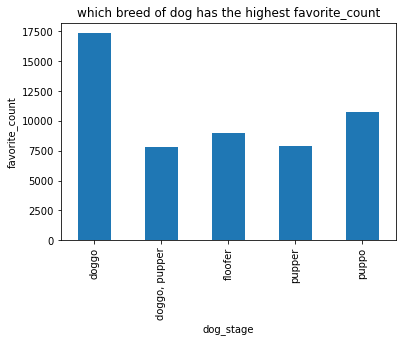

In [71]:
df.groupby('dog_stage').favorite_count.mean().plot(kind= 'bar')
plt.ylabel("favorite_count")
plt.title("which breed of dog has the highest favorite_count");

From the plot above, it is seen that dog breed `doggo` has the highest favorite count compared to other breeds of dog

**Visualization for insight 2 Check correlation between p2 and p3**

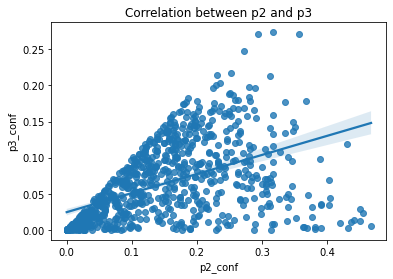

In [72]:
sns.regplot(x=df["p2_conf"], y=df["p3_conf"])
plt.title("Correlation between p2 and p3");

From the plot above, it is seen that there is a positive correlation between p2 algorithm and p3 algorithm

**Visualization for insight 3 Check which breed of dog has the highest rating**

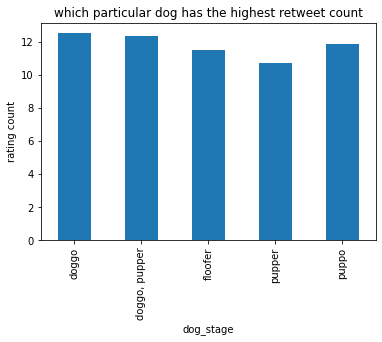

In [73]:
df.groupby('dog_stage').rating_numerator.mean().plot(kind= 'bar')
plt.ylabel("rating count")
plt.title("which particular dog has the highest retweet count");

The plot above shows that, doggo has the highest rating count compared to puppo with a slight difference of about +2 points

**Visualization for insight 4 Check which breed of dog has the highest retweet count**

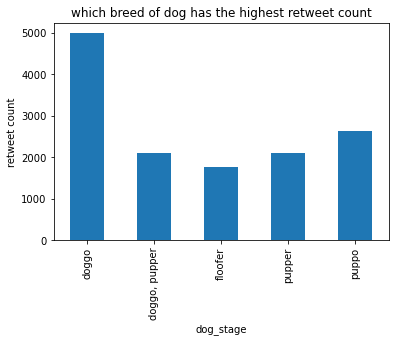

In [74]:
df.groupby('dog_stage').retweet_count.mean().plot(kind= 'bar')
plt.ylabel("retweet count")
plt.title("which breed of dog has the highest retweet count");

The plot above shows that doggo has the highest retweet count compared to other breeds